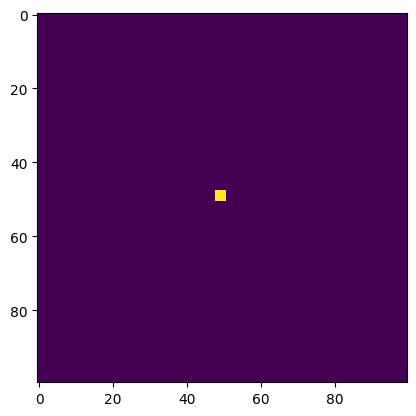

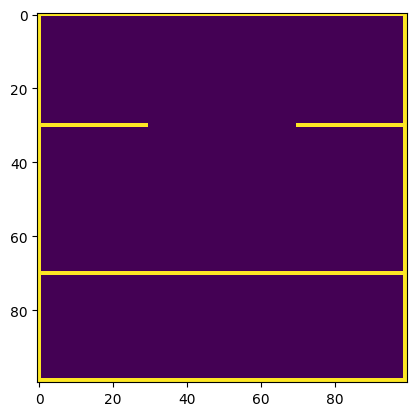

In [8]:
import numpy as np


## Setting up the environment

In [ ]:

# Horiz velocity of every cell in the grid, these are placed "in the middle of the vertical lines" of the grid
'''
Velocity i,j corresponds to the particles left and up of cell i,j
'''
grid_width = 100
grid_height = 100
horizonal_velocities = np.zeros((grid_height, grid_width+1))
vertical_velocities = np.zeros((grid_height+1, grid_width))

# Example grid mask for sources of pressure
sources = np.zeros((grid_height, grid_width))
sources[48:51, 48:51] = 1

# Example grid mask for obstacles (tunnel walls)
obstacles = np.zeros((grid_height, grid_width))
# Sets the boundary of the grid to be an obstacle
obstacles[0, :] = 1
obstacles[-1, :] = 1
obstacles[:, 0] = 1
obstacles[:, -1] = 1
# Sets a tunnel in the middle of the grid
obstacles[30, :] = 1
obstacles[70, :] = 1
obstacles[30, 30:70] = 0

## Modify velocity values

In [ ]:
def flow_sources(horizontal_velocities, vertical_velocities, sources, velocity, dt):
    """
    Adds flow to the grid based on the sources,
    velocities area evenly added to particles on the edges of the source cells
    """
    delta_velocity = sources * velocity * dt
    horizontal_velocities        -= delta_velocity
    vertical_velocities          -= delta_velocity
    horizontal_velocities[:, 1:] += delta_velocity
    vertical_velocities[1:, :]   += delta_velocity

## Projection (making fluid incompressible)

#### Divergence (Total Outflow)

In [13]:
def calc_divergence(horizontal_velocities, vertical_velocities):
    """
    Calculates the outflow of every cell
    """
    return (horizontal_velocities[:, 1:] - horizontal_velocities) + (vertical_velocities[1:, :] - vertical_velocities)

def get_n_blocked_neighbors(obstacles):
    return np.roll(obstacles, 1, axis=0) + np.roll(obstacles, -1, axis=0) + np.roll(obstacles, 1, axis=1) + np.roll(obstacles, -1, axis=1)
    # TODO: INCOMPLETE, stopped here, goodnight

def fix_divergence(horizontal_velocities, vertical_velocities, divergence, n_blocked_neighbors):
    """
    Fixes the divergence of the grid by adding velocity to the cells such that divergence is 0
    """
    # The amount of velocity to add to each cell
    delta_velocity = divergence / (4 - n_blocked_neighbors)
    # Add the velocity to the cells
    horizontal_velocities[:, 1:] -= delta_velocity
    vertical_velocities[1:, :]   -= delta_velocity
    horizontal_velocities        += delta_velocity
    vertical_velocities          += delta_velocity

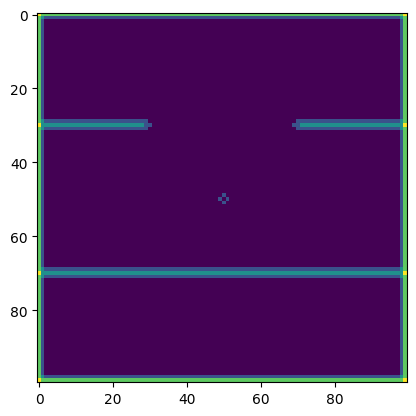

In [15]:
# displays n_blocked_neighbors
import matplotlib.pyplot as plt